In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
# input file (use: Na22, Co60, Cs137, stretchBa133, newcalUnknown) ## confusion on how to use stretchCd109, stretchCo57
f = "stretchBa133"
name = 'stretchBa133' # for the plot title

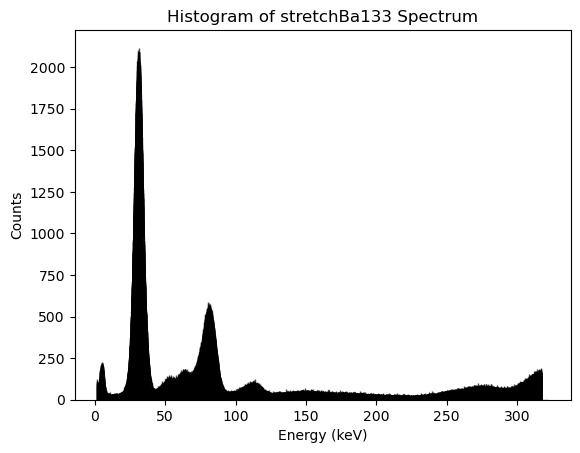

In [7]:
### graph the data, visually determine the domain of the compton edge and input into next cell

# Define the calibration function
# check if f has stretch as the first substring
def calb(bin):
  if "stretch" in f:
    st = 0.019721
    return -0.821608 + bin* 0.019721, st
  elif "newcal" in f:
    st = 0.122689
    return -40.239563 + bin * 0.122689, st
  else:
    st = 0.090725
    return -40.609966 + bin * 0.090725, st
a, st = calb(0)
shift = 130 ### for Cs137 use 2000 or smth big to get rid of tall peak at beginning

# Open and read the file
file = open(f+'.Spe', "r")
lines = file.readlines()
file.close()

# Extract the counts from the file (only includes the counts in each bin in lines)
counts = lines[12+shift:16396]
counts = [int(i.strip()) for i in counts]

# Define the bins
bins = []
for i in range(shift, shift + len(counts)):
  bins.append( calb(i)[0] )

plt.bar(bins, counts, width= st, align='edge', alpha=0.7, edgecolor='black')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Histogram of '+ name + ' Spectrum')
plt.show()

333.39349586735295 $\pm$ 1.21015126650615 172.25398885703848 $\pm$ 1.7109484692802288
1067.3125375278412 $\pm$ 4.400553485492816 35.78251702079618 $\pm$ 0.9159271167996987


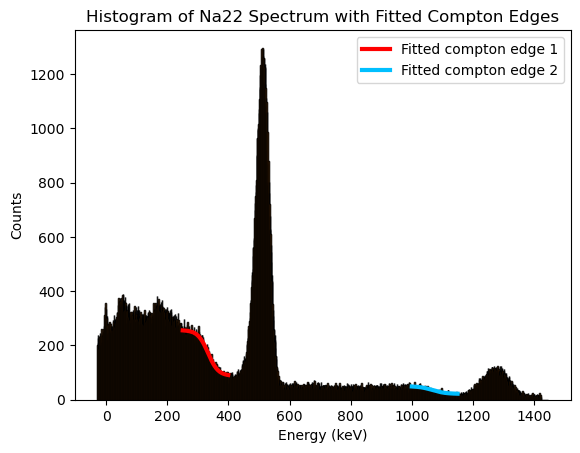

In [4]:
# Input left and right energy domains of compton edges
# 
# if f == 'Na22':
#     edges=[ (250,400), (1000,1150) ]
# elif f == 'Co60':
#     edges = [(880,1050)]
# elif f == 'Cs137':
#     edges = [(410,570)]
# elif f == 'stretchBa133':
#     edges= [(175,205)]
# elif f == 'newcalUnknown':
#     edges = [(400, 570)]




# # Increase bin size by a factor of n (adjust this value to change bin size)
# n = 10  # new bin size factor
# rebinned_counts = [sum(counts[i:i+n]) for i in range(0,len(counts), n)]
# rebinned_bins = [calb(i)[0] for i in range(shift,shift+len(counts), n)]

# # find the corresponding bin for the left and right edges
# bottombins = []
# topbins = []
# for edge in edges:
#     for i in range(len(rebinned_bins)):
#         if rebinned_bins[i] > edge[0]:
#             bottombins.append(i)
#             break
#     # find the first bin that is greater than 400
#     for i in range(len(rebinned_bins)):
#         if rebinned_bins[i] > edge[1]:
#             topbins.append(i)
#             break

# # determine initial guess for tanh fit based on compton edge energies

# guesses = []
# for i in range(len(edges)):
#     print
#     a = (rebinned_counts[ bottombins[i] ] - rebinned_counts[ topbins[i] ])/2
#     b = (-4) / (edges[i][1] - edges[i][0])
#     c = -(edges[i][1] + edges[i][0]) / 2
#     d = (rebinned_counts[ bottombins[i] ] + rebinned_counts[ topbins[i] ])/2
#     guesses.append([a,b,c,d])

# def tanh(x, a, b, c, d):
#     return a * np.tanh(b * (x + c)) + d

# def tanh_inflection(a, b, c, d):
#     return (-c, d)

# for i in range(len(edges)):
#     xdata = (rebinned_bins[bottombins[i]:topbins[i]])
#     ydata = (rebinned_counts[bottombins[i]:topbins[i]])
#     popt, pcov = curve_fit(tanh, xdata, ydata, p0=guesses[i])
#     if i == 0: col = 'red' 
#     else: col = '#00BFFF'
#     plt.plot(xdata, tanh(xdata, *popt), color = col, label="Fitted compton edge " +str(i+1), linewidth=3)
#     # plt.plot(xdata, ydata, 'o')
#     # plt.bar(bins, counts, width= 0.090725, align='edge', alpha=0.7, edgecolor='black')
#     plt.bar(rebinned_bins, rebinned_counts, width=n*st, align='edge', alpha=0.7, edgecolor='black')
#     plt.title('Histogram of '+ name + ' Spectrum with Fitted Compton Edges')
#     plt.xlabel('Energy (keV)')
#     plt.ylabel('Counts')
#     plt.legend()
#     plt.savefig(f)
#     point = (tanh_inflection(*popt))
#     err = np.sqrt(np.diag(pcov))
#     print(point[0], '$\\pm$',err[2], point[1], '$\\pm$', err[3])

# # zoom in on one edge to see if the fit is good
# # i=0
# # xdata = (rebinned_bins[bottombins[i]:topbins[i]])
# # ydata = (rebinned_counts[bottombins[i]:topbins[i]])
# # popt, pcov = curve_fit(tanh, xdata, ydata, p0=guesses[i])
# # plt.plot(xdata, ydata, 'o')
# # plt.plot(xdata, tanh(xdata, *popt), color='red', label="Fitted compton edge " +str(i+1), linewidth=2)
# # plt.legend()
# # print(guesses[i])
# # print(popt)
# # plt.show()

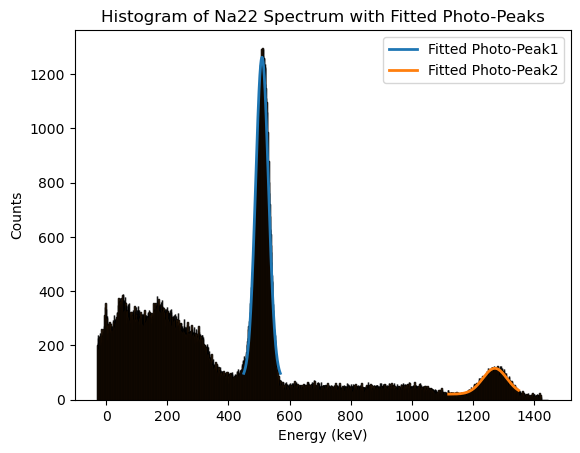

In [6]:
# IGNORE
# Input left and right energy domains of photopeak edges

# if f == 'Na22':
#     pedges=[ (450,570), (1120,1350) ]
# elif f == 'Co60':
#     pedges = [(1100,1250)]
# elif f == 'Cs137':
#     pedges = [(575,725)]
# elif f == 'stretchBa133':
#     pedges= [(260,285)]
# elif f == 'newcalUnknown':
#     pedges = [(575,725)]


# # find the corresponding bin for the left and right edges
# pbottombins = []
# ptopbins = []
# for pedge in pedges:
#     for i in range(len(rebinned_bins)):
#         if rebinned_bins[i] > pedge[0]:
#             pbottombins.append(i)
#             break
#     for i in range(len(rebinned_bins)):
#         if rebinned_bins[i] > pedge[1]:
#             ptopbins.append(i)
#             break

# def gaussian(x, a, mu, sigma, offset):
#     return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + offset


# for i in range(len(pedges)):
#     pxdata = (rebinned_bins[pbottombins[i]:ptopbins[i]])
#     pydata = (rebinned_counts[pbottombins[i]:ptopbins[i]])

#     midbin= (pbottombins[i] + ptopbins[i])//2
#     pa = rebinned_counts[midbin]
#     pm = rebinned_bins[midbin]
#     ps = (rebinned_bins[ptopbins[i]] - rebinned_bins[pbottombins[i]])/10
#     pd=0
#     pguess = [pa,pm,ps,pd]

#     ppopt, ppcov = curve_fit(gaussian, pxdata, pydata, p0=pguess)
#     plt.plot(pxdata, gaussian(pxdata, *ppopt), label="Fitted Photo-Peak" +str(i+1), linewidth=2)
#     plt.bar(rebinned_bins, rebinned_counts, width=n*st, align='edge', alpha=0.7, edgecolor='black')
#     plt.title('Histogram of '+ name + ' Spectrum with Fitted Photo-Peaks')
#     plt.xlabel('Energy (keV)')
#     plt.ylabel('Counts')
#     plt.legend()
#     plt.savefig(f)

Inflection Points:
Na22        333.39349586735295 $\pm$ 1.21015126650615 172.25398885703848 $\pm$ 1.7109484692802288
            1067.3125375278412 $\pm$ 4.400553485492816 35.78251702079618 $\pm$ 0.9159271167996987

Co60        973.8743419452348 $\pm$ 2.5337371514897997 229.00086834974587 $\pm$ 1.8894963540773626

Cs137       477.05943112329146 $\pm$ 0.46979741730589997 406.6958939438408 $\pm$ 2.286943757910427

Ba133       191.3238157332855 $\pm$ 0.8985591806027495 291.6666038455789 $\pm$ 3.289064444461386

Unknown     475.29943247142126 $\pm$ 0.8565533080990404 170.51830368907417 $\pm$ 1.6343468459513095

Inflection Points
191.3238157332855 $\pm$ 0.8985591806027495 291.6666038455789 $\pm$ 3.289064444461386
Gaussian Peaks - Photopeaks
275.68885169078453 $\pm$ 0.2359427040219998


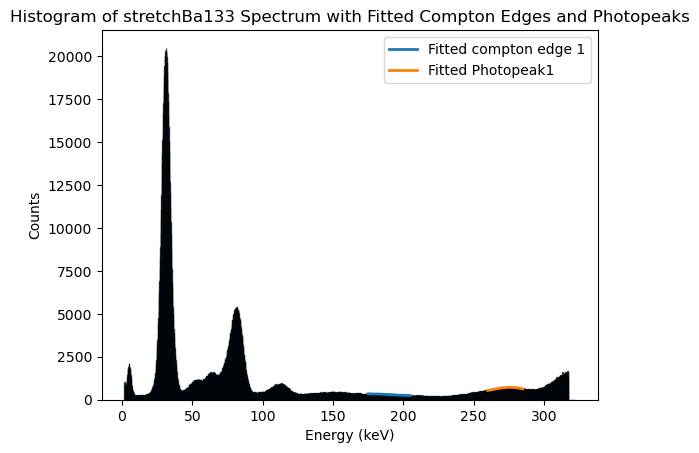

In [8]:
# Input left and right energy domains of compton edges

if f == 'Na22':
    edges=[ (250,400), (1000,1150) ]
elif f == 'Co60':
    edges = [(880,1050)]
elif f == 'Cs137':
    edges = [(410,570)]
elif f == 'stretchBa133':
    edges= [(175,205)]
elif f == 'newcalUnknown':
    edges = [(400, 570)]

if f == 'Na22':
    pedges=[ (450,570), (1120,1350) ]
elif f == 'Co60':
    pedges = [(1100,1250)]
elif f == 'Cs137':
    pedges = [(575,725)]
elif f == 'stretchBa133':
    pedges= [(260,285)]
elif f == 'newcalUnknown':
    pedges = [(575,725)]




# Increase bin size by a factor of n (adjust this value to change bin size)
n = 10  # new bin size factor
rebinned_counts = [sum(counts[i:i+n]) for i in range(0,len(counts), n)]
rebinned_bins = [calb(i)[0] for i in range(shift,shift+len(counts), n)]

# COMPTON find the corresponding bin for the left and right edges
bottombins = []
topbins = []
for edge in edges:
    for i in range(len(rebinned_bins)):
        if rebinned_bins[i] > edge[0]:
            bottombins.append(i)
            break
    # find the first bin that is greater than 400
    for i in range(len(rebinned_bins)):
        if rebinned_bins[i] > edge[1]:
            topbins.append(i)
            break

# PHOTO find the corresponding bin for the left and right edges
pbottombins = []
ptopbins = []
for pedge in pedges:
    for i in range(len(rebinned_bins)):
        if rebinned_bins[i] > pedge[0]:
            pbottombins.append(i)
            break
    for i in range(len(rebinned_bins)):
        if rebinned_bins[i] > pedge[1]:
            ptopbins.append(i)
            break

# determine initial guess for tanh fit based on compton edge energies

guesses = []
for i in range(len(edges)):
    print
    a = (rebinned_counts[ bottombins[i] ] - rebinned_counts[ topbins[i] ])/2
    b = (-4) / (edges[i][1] - edges[i][0])
    c = -(edges[i][1] + edges[i][0]) / 2
    d = (rebinned_counts[ bottombins[i] ] + rebinned_counts[ topbins[i] ])/2
    guesses.append([a,b,c,d])

def gaussian(x, a, mu, sigma, offset):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + offset
    
def tanh(x, a, b, c, d):
    return a * np.tanh(b * (x + c)) + d

def tanh_inflection(a, b, c, d):
    return (-c, d)

print("Inflection Points")
for i in range(len(edges)):
    xdata = (rebinned_bins[bottombins[i]:topbins[i]])
    ydata = (rebinned_counts[bottombins[i]:topbins[i]])
    popt, pcov = curve_fit(tanh, xdata, ydata, p0=guesses[i])
    plt.plot(xdata, tanh(xdata, *popt), label="Fitted compton edge " +str(i+1), linewidth=2)
    plt.bar(rebinned_bins, rebinned_counts, width=n*st, align='edge', alpha=0.7, edgecolor='black')
    point = (tanh_inflection(*popt))
    err = np.sqrt(np.diag(pcov))
    print(point[0], '$\\pm$',err[2], point[1], '$\\pm$', err[3])

print("Gaussian Peaks - Photopeaks")
for i in range(len(pedges)):
    pxdata = (rebinned_bins[pbottombins[i]:ptopbins[i]])
    pydata = (rebinned_counts[pbottombins[i]:ptopbins[i]])

    midbin= (pbottombins[i] + ptopbins[i])//2
    pa = rebinned_counts[midbin]
    pm = rebinned_bins[midbin]
    ps = (rebinned_bins[ptopbins[i]] - rebinned_bins[pbottombins[i]])/10
    pd=0
    pguess = [pa,pm,ps,pd]

    ppopt, ppcov = curve_fit(gaussian, pxdata, pydata, p0=pguess)
    plt.plot(pxdata, gaussian(pxdata, *ppopt), label="Fitted Photopeak" +str(i+1), linewidth=2)
    # plt.bar(rebinned_bins, rebinned_counts, width=n*st, align='edge', alpha=0.7, edgecolor='black')
    
    print(ppopt[1], '$\\pm$', np.sqrt(ppcov[1][1]))

    plt.title('Histogram of '+ name + ' Spectrum with Fitted Compton Edges and Photopeaks')
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts')
    plt.legend()
    plt.savefig(f)
